# Introduction

<font color = 'green'>
Content:
    
 1. [Bar Plot](#1)
 2. [Point Plot](#2)
 3. [Joint Plot](#3)
 4. [Pie Chart](#4)
 5. [Lm Plot](#5)
 6. [Kde Plot](#6)
 7. [Violin Plot](#7)
 8. [Heatmap](#8)
 9. [Box Plot](#9)
 10. [Swarm Plot](#10)
 11. [Pair Plot](#11)
 12. [Count Plot](#12)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import warnings
warnings.filterwarnings('ignore') 

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

/kaggle/input/us-police-shootings/shootings.csv
us-police-shootings



In [2]:
shootings = pd.read_csv('/kaggle/input/us-police-shootings/shootings.csv', encoding="windows-1252")

In [3]:
shootings.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
shootings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4895 non-null   int64  
 1   name                     4895 non-null   object 
 2   date                     4895 non-null   object 
 3   manner_of_death          4895 non-null   object 
 4   armed                    4895 non-null   object 
 5   age                      4895 non-null   float64
 6   gender                   4895 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     4895 non-null   object 
 9   state                    4895 non-null   object 
 10  signs_of_mental_illness  4895 non-null   bool   
 11  threat_level             4895 non-null   object 
 12  flee                     4895 non-null   object 
 13  body_camera              4895 non-null   bool   
 14  arms_category           

In [5]:
shootings.age.value_counts()

25.0    176
31.0    174
27.0    165
33.0    164
29.0    160
       ... 
13.0      1
91.0      1
79.0      1
78.0      1
81.0      1
Name: age, Length: 76, dtype: int64

In [6]:
shootings['state'].unique()

array(['WA', 'OR', 'KS', 'CA', 'CO', 'OK', 'AZ', 'IA', 'PA', 'TX', 'OH',
       'LA', 'MT', 'UT', 'AR', 'IL', 'NV', 'NM', 'MN', 'MO', 'VA', 'NJ',
       'IN', 'KY', 'MA', 'NH', 'FL', 'ID', 'MD', 'NE', 'MI', 'GA', 'TN',
       'NC', 'AK', 'NY', 'ME', 'AL', 'MS', 'WI', 'SC', 'DE', 'DC', 'WV',
       'HI', 'WY', 'ND', 'CT', 'SD', 'VT', 'RI'], dtype=object)

<a id = "1"></a><br>
## Bar Plot

Text(0.5, 1.0, 'Age Given States')

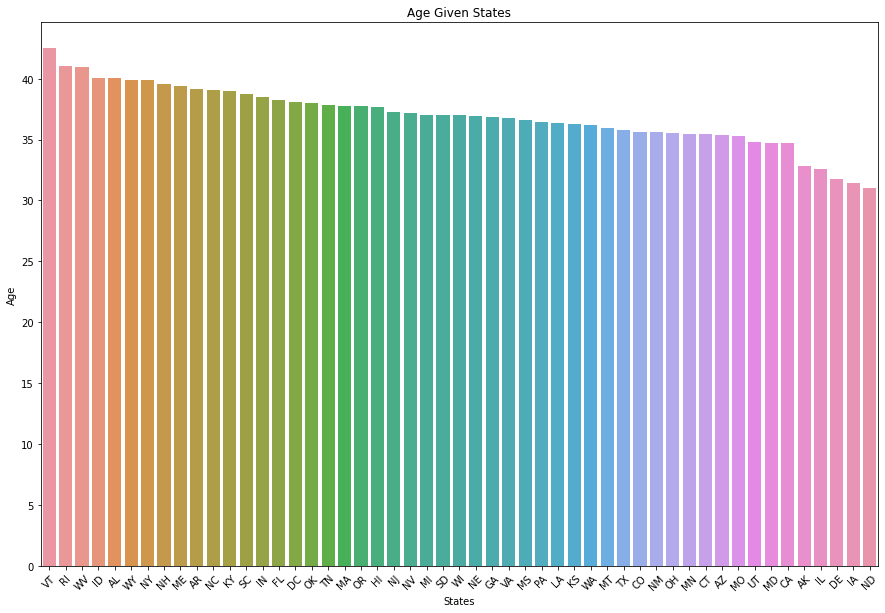

In [7]:
state_list = list(shootings['state'].unique())
state_ratio = []

for i in state_list:
    x = shootings[shootings['state']==i]
    age_state = sum(x.age)/len(x)
    state_ratio.append(age_state)
    
data = pd.DataFrame({'state_list' : state_list, 'state_ratio' : state_ratio})
new_index = (data['state_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['state_list'], y=sorted_data['state_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('States')
plt.ylabel('Age')
plt.title('Age Given States')

In [8]:
shootings.name.value_counts()

TK TK                    29
Roderick McDaniel         2
Miguel Mercado Segura     2
Robert Edwards            2
David Tylek Atkinson      2
                         ..
Terrence Sterling         1
Adrian Joseph Shaffer     1
Dennis Claude Stanley     1
Gregory Frazier           1
Nicholas Hirsh            1
Name: name, Length: 4851, dtype: int64

Text(0.5, 1.0, 'Most common 15 Name or Surname of killed people')

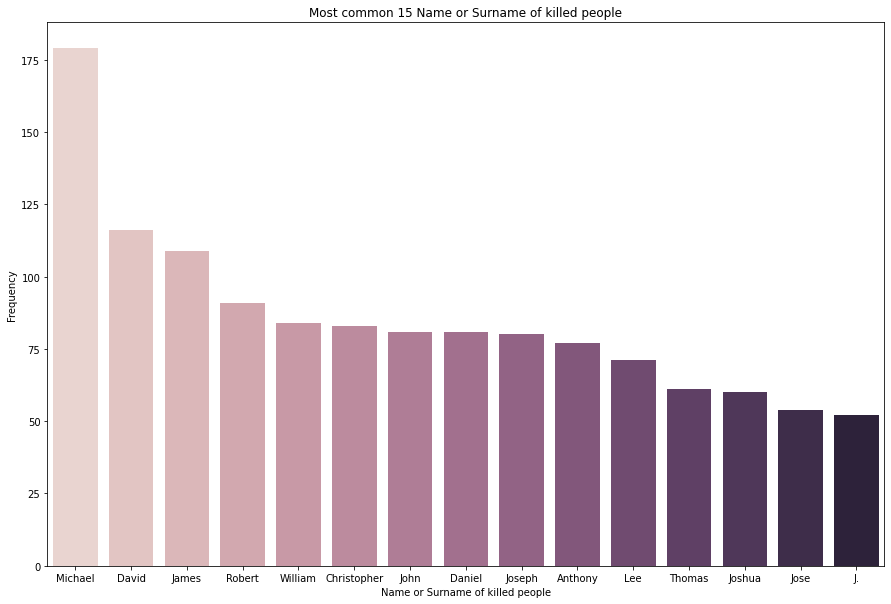

In [9]:
separate = shootings.name[shootings.name != 'TK TK'].str.split() 
a,b = zip(*separate)
name_list = a+b                         
name_count = Counter(name_list)         
most_common_names = name_count.most_common(15)  
x,y = zip(*most_common_names)
x,y = list(x),list(y)

plt.figure(figsize=(15,10))
ax= sns.barplot(x=x, y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel('Name or Surname of killed people')
plt.ylabel('Frequency')
plt.title('Most common 15 Name or Surname of killed people')

In [10]:
shootings['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unknown',
       'shovel', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
       'guns and explosives', 'cordless drill', 'metal pole', 'Taser',
       'metal pipe', 'metal hand tool', 'blunt object', 'metal stick',
       'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'stapler', 'crossbow', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake', 'baton',
       'crowbar', 'oar', 'machete and gun', 'air conditioner',
       'pole and knife', 'beer bottle', 'base

In [11]:
shootings.armed.value_counts()

gun                    2755
knife                   708
unknown                 418
unarmed                 348
toy weapon              171
                       ... 
metal rake                1
oar                       1
machete and gun           1
air conditioner           1
car, knife and mace       1
Name: armed, Length: 89, dtype: int64

Text(0.5, 1.0, 'Age Given Armed')

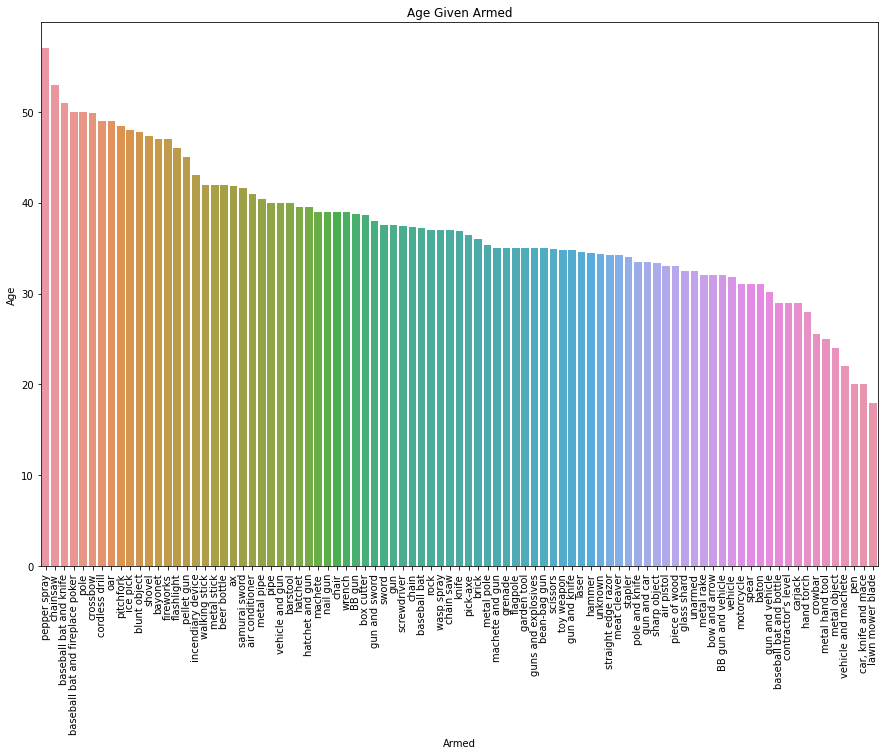

In [12]:
armed_list = list(shootings['armed'].unique())
armed_age = []

for i in armed_list:
    x = shootings[shootings['armed']==i]
    y = sum(x.age)/len(x)
    armed_age.append(y)
    
data = pd.DataFrame({'armed_list' : armed_list, 'armed_age' : armed_age})
new_index = (data['armed_age'].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['armed_list'], y=sorted_data2['armed_age'])
plt.xticks(rotation= 90)
plt.xlabel('Armed')
plt.ylabel('Age')
plt.title("Age Given Armed")

<a id = "2"></a><br>
## Point Plot

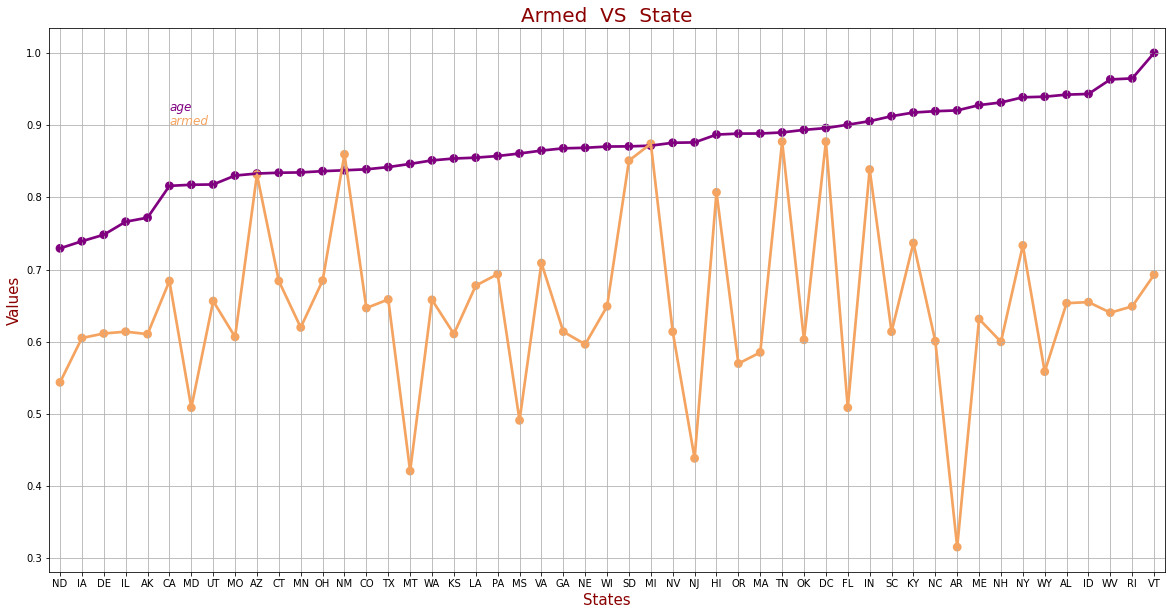

In [13]:
sorted_data['state_ratio'] = sorted_data['state_ratio']/max( sorted_data['state_ratio'])
sorted_data2['armed_age'] = sorted_data2['armed_age']/max( sorted_data2['armed_age'])
data = pd.concat([sorted_data,sorted_data2['armed_age']],axis=1)
data.sort_values('state_ratio',inplace=True)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='state_list',y='state_ratio',data=data,color='purple',alpha=0.8)
sns.pointplot(x='state_list',y='armed_age',data=data,color='sandybrown',alpha=0.8)
plt.text(5,0.90,'armed',color='sandybrown',fontsize = 12,style = 'italic')
plt.text(5,0.92,'age',color='purple',fontsize = 12,style = 'italic')
plt.xlabel('States',fontsize = 15,color='darkred')
plt.ylabel('Values',fontsize = 15,color='darkred')
plt.title('Armed  VS  State',fontsize = 20,color='darkred')
plt.grid()

<a id = "3"></a><br>
## Joint Plot

In [14]:
data.head()

,state_list,state_ratio,armed_age
46,ND,0.729412,0.543860
7,IA,0.739279,0.605263
41,DE,0.748235,0.611529
15,IL,0.766279,0.614035
34,AK,0.771895,0.610664


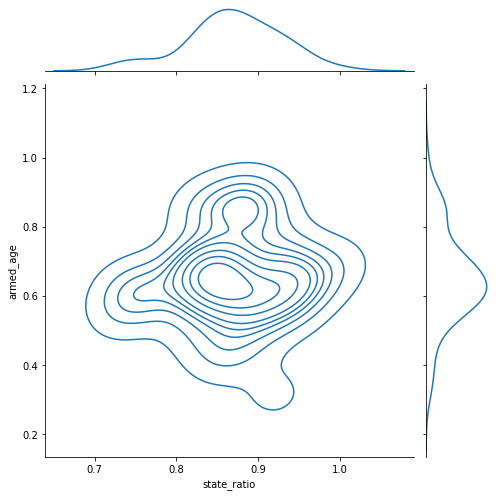

In [15]:
g = sns.jointplot(data.state_ratio, data.armed_age, kind="kde",size=7)
plt.savefig('graph.png')
plt.show()

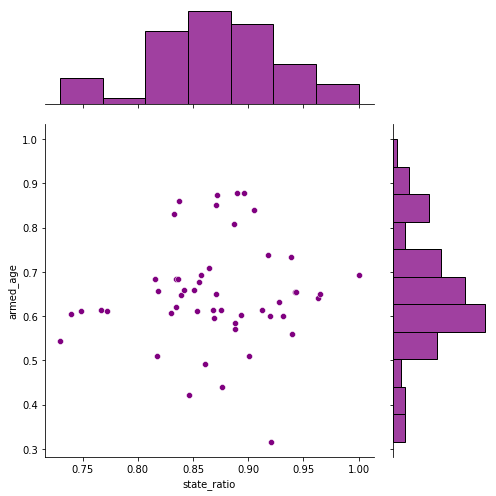

In [16]:
g = sns.jointplot("state_ratio","armed_age", data=data,size=7, ratio=3, color="purple")

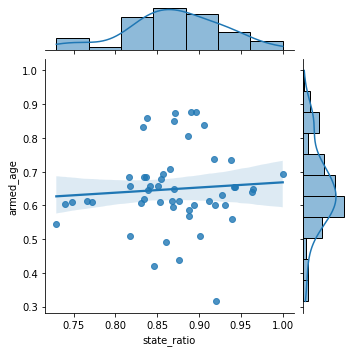

In [17]:
g=sns.jointplot(data.state_ratio, data.armed_age,kind="reg",size=5)

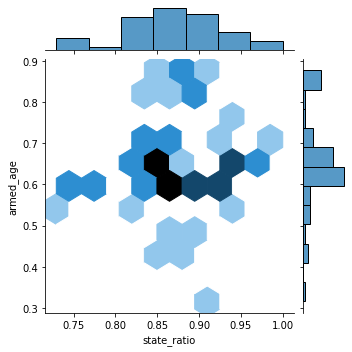

In [18]:
g=sns.jointplot(data.state_ratio, data.armed_age,kind="hex",size=5)

<a id = "4"></a><br>
## Pie Chart

In [19]:
shootings.race.value_counts().index

Index(['White', 'Black', 'Hispanic', 'Asian', 'Native', 'Other'], dtype='object')

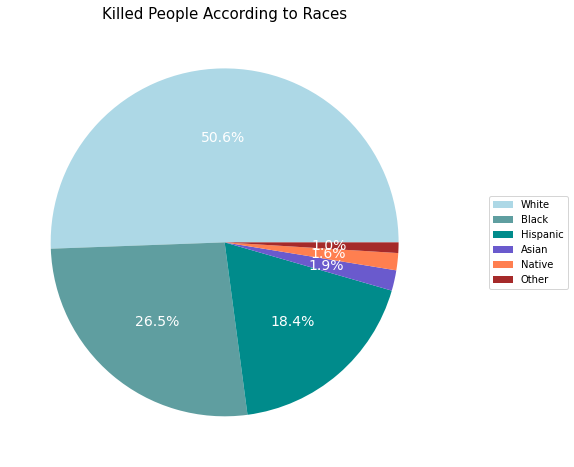

In [20]:
shootings.race.dropna(inplace=True)
labels = shootings.race.value_counts().index
colors = ['lightblue','cadetblue','darkcyan','slateblue','coral','brown']
explode = [0,0,0,0,0,0]
sizes = shootings.race.value_counts().values

plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',textprops={'fontsize': 14,'color':"#FFFFFF"})
plt.legend(loc="center right",bbox_to_anchor=(1,0,0.3,1))
plt.title('Killed People According to Races', color='black', fontsize=15)
plt.show()

<a id = "5"></a><br>
## Lm Plot

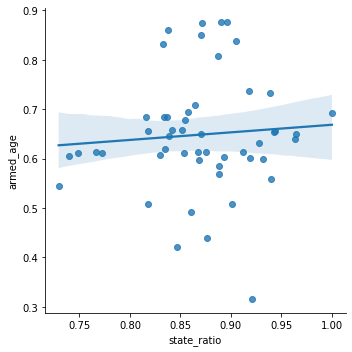

In [21]:
sns.lmplot(x="state_ratio", y="armed_age", data=data)
plt.show()

<a id = "6"></a><br>
## Kde Plot

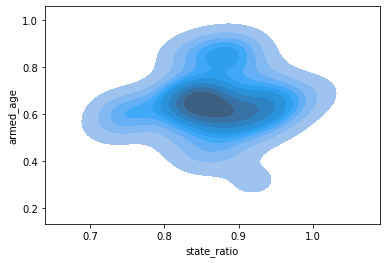

In [22]:
sns.kdeplot(data.state_ratio, data.armed_age, shade=True, cut=3)
plt.show()

<a id = "7"></a><br>
## Violin Plot

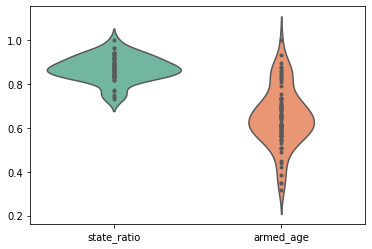

In [23]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette="Set2", inner="points")
plt.show()

<a id = "8"></a><br>
## Heatmap

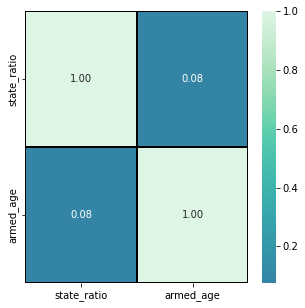

In [24]:
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(data.corr(),annot=True,fmt='.2f',ax=ax,center= 0,cmap= 'mako',linewidths=2, linecolor='black')
plt.show()

<a id = "9"></a><br>
## Box Plot

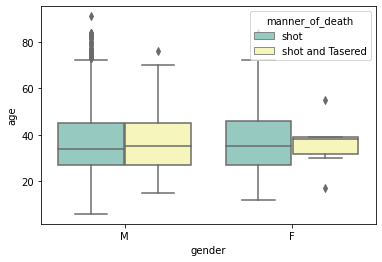

In [25]:
sns.boxplot(x="gender", y="age", hue="manner_of_death", data=shootings, palette="Set3")
plt.show()

<a id = "10"></a><br>
## Swarm Plot

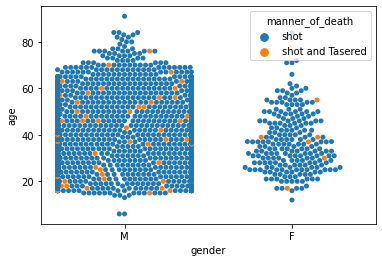

In [26]:
sns.swarmplot(x="gender", y="age", hue="manner_of_death", data=shootings)
plt.show()

<a id = "11"></a><br>
## Pair Plot

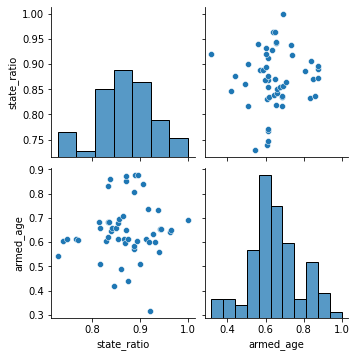

In [27]:
sns.pairplot(data)
plt.show()

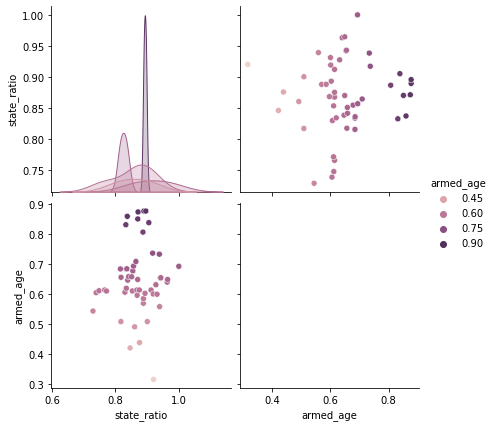

In [28]:
sns.pairplot(data,vars=["state_ratio","armed_age"],hue="armed_age",size=3)
plt.show()

<a id = "12"></a><br>
## Count Plot

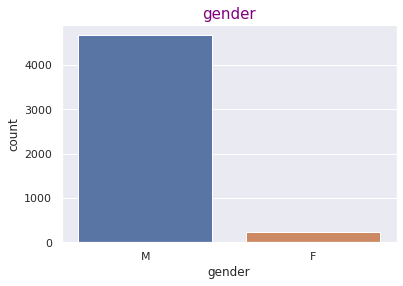

In [29]:
sns.set_theme(style="darkgrid")
sns.countplot(shootings.gender)
plt.title("gender",color="purple",fontsize=15)
plt.show()

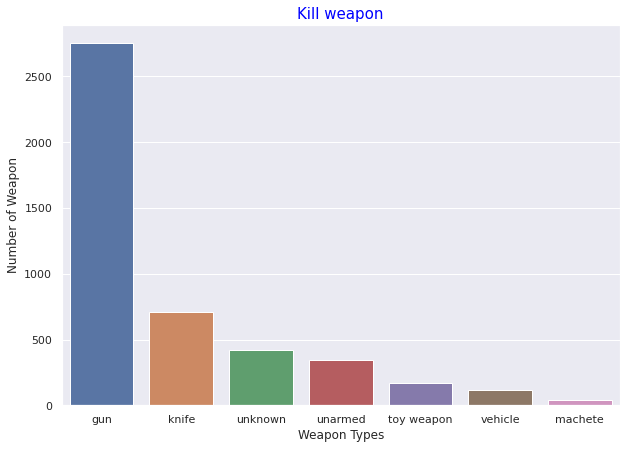

In [30]:
armed = shootings.armed.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index, y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color='blue',fontsize=15)
plt.show()

Text(0.5, 1.0, 'Age of Killed people')

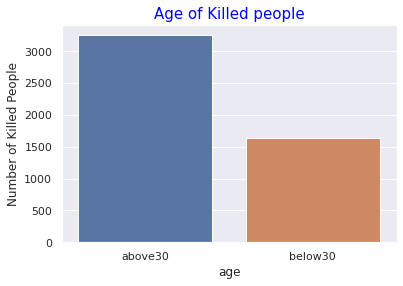

In [31]:
above30 = ['above30' if i>=30 else 'below30' for i in shootings.age]
df = pd.DataFrame({'age' : above30})
sns.countplot(x=df.age)
plt.ylabel('Number of Killed People')
plt.title('Age of Killed people', color='blue', fontsize=15)

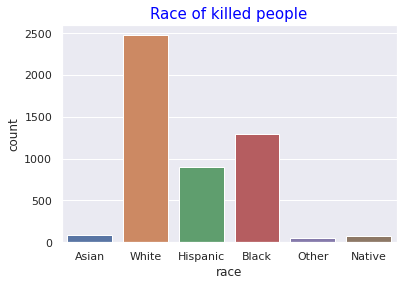

In [32]:
sns.countplot(data=shootings, x='race')
plt.title('Race of killed people',color='blue',fontsize=15)
plt.show()

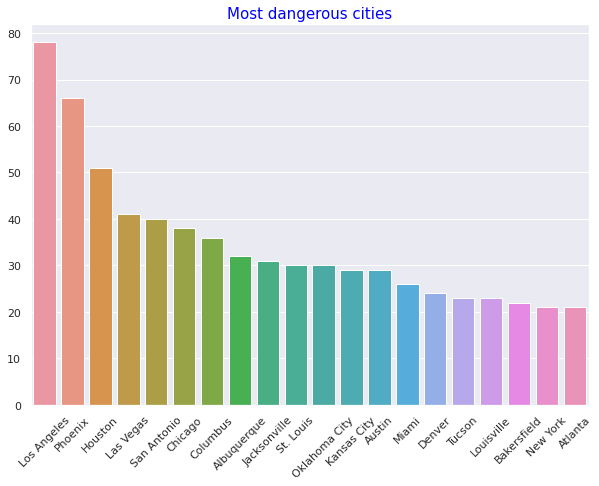

In [33]:
city = shootings.city.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=city[:20].index, y=city[:20].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities', color='blue', fontsize=15)
plt.show()

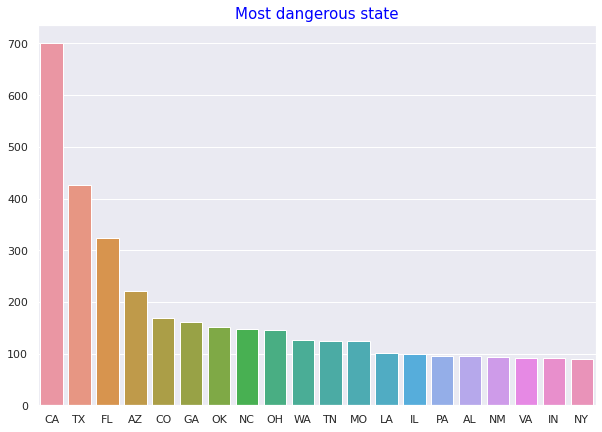

In [34]:
state = shootings.state.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=state[:20].index,y=state[:20].values)
plt.title('Most dangerous state',color = 'blue',fontsize=15)
plt.show()

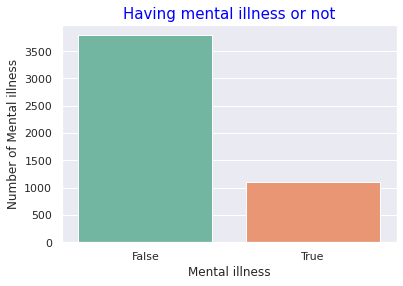

In [35]:
sns.countplot(shootings.signs_of_mental_illness,palette="Set2")
plt.xlabel('Mental illness')
plt.ylabel('Number of Mental illness')
plt.title('Having mental illness or not',color = 'blue', fontsize = 15)
plt.show()

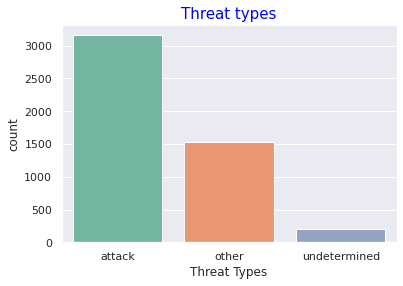

In [36]:
sns.countplot(shootings.threat_level,palette="Set2")
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)
plt.show()

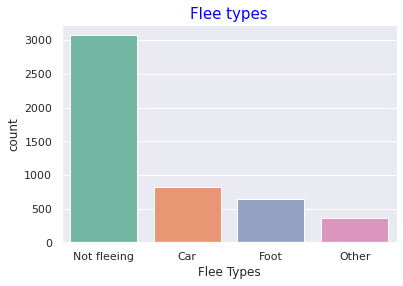

In [37]:
sns.countplot(shootings.flee,palette="Set2")
plt.xlabel('Flee Types')
plt.title('Flee types',color = 'blue', fontsize = 15)
plt.show()

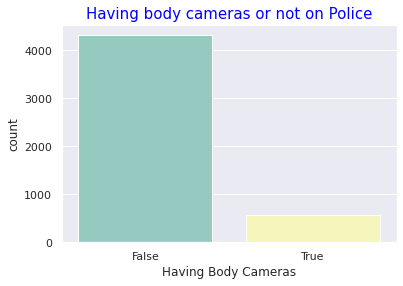

In [38]:
sns.countplot(shootings.body_camera,palette="Set3")
plt.xlabel('Having Body Cameras')
plt.title('Having body cameras or not on Police',color = 'blue',fontsize = 15)
plt.show()

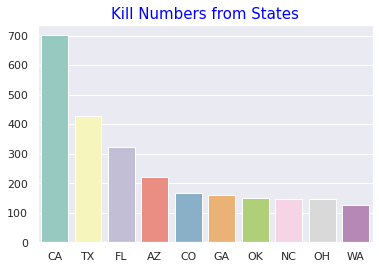

In [39]:
sta = shootings.state.value_counts().index[:10]
sns.barplot(x=sta,y = shootings.state.value_counts().values[:10],palette="Set3")
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)
plt.show()